# Demo de Inferencia de Similitud con Modelo Siamés CLIP

Este notebook muestra cómo utilizar el modelo siamés CLIP para calcular la similitud entre imágenes.

In [1]:
import os
import torch
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
from pathlib import Path

from inference import SimilarityInference

## 1. Cargar el modelo

Primero, cargamos el modelo desde un checkpoint guardado.

In [2]:
checkpoint_path = "secondTrain/best_model.pt"

# Inicializar el modelo
inference = SimilarityInference(checkpoint_path)
print(f"Modelo cargado desde {checkpoint_path}")

Utilizando dispositivo: cuda
Modelo cargado desde secondTrain/best_model.pt
Época: 13
Mejor pérdida de validación: 0.07781814225931086
Modelo cargado desde secondTrain/best_model.pt


## 2. Comparar dos imágenes

Vamos a calcular la similitud entre dos imágenes específicas.

Similitud entre las imágenes: 0.2402


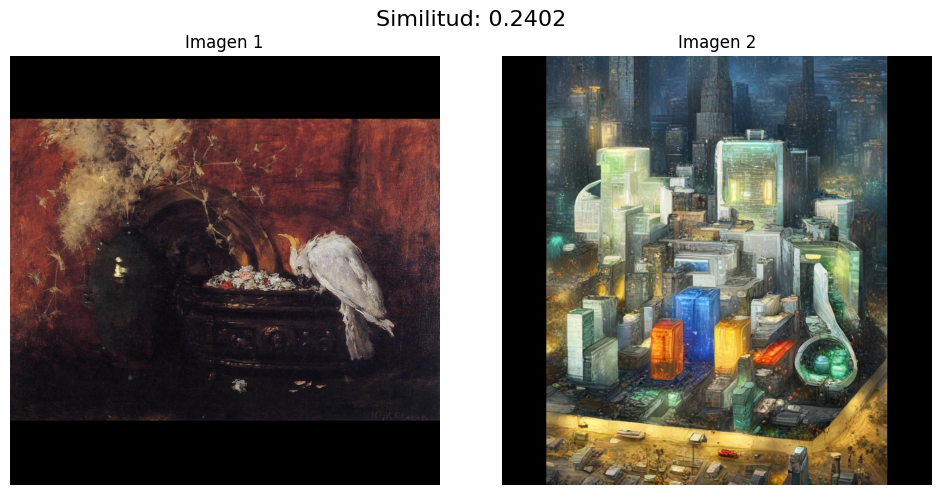

In [7]:
# Rutas a las imágenes
image1_path = "imagenes/resize768/Impressionism/william-merritt-chase_still-life-with-cockatoo_resize768.jpg"
# image2_path = "imagenes/SDXL/Impressionism/william-merritt-chase_still-life-with-cockatoo_resize768_generated.jpg"

#image1_path = "imagenes/resize768/Post_Impressionism/pyotr-konchalovsky_dry-paints-1913_resize768.jpg"
image2_path = "imagenes/SDXL/Post_Impressionism/pyotr-konchalovsky_dry-paints-1913_resize768_generated.jpg"

# # Si no quieres usar texto, simplemente pasa None
text1 = None # o None
# text2 = "a white bird is perched on a tall building " # o None
text1 = None  # o None
# text2 = "a painting of a futuristic city at night " # o None
# Calcular similitud
similarity = inference.calculate_similarity(image1_path, image2_path, text1, text2)
print(f"Similitud entre las imágenes: {similarity:.4f}")
# Visualizar las imágenes
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Mostrar imagen 1
img1 = Image.open(image1_path).convert('RGB')
axes[0].imshow(img1)
axes[0].set_title("Imagen 1")
axes[0].axis('off')

# Mostrar imagen 2
img2 = Image.open(image2_path).convert('RGB')
axes[1].imshow(img2)
axes[1].set_title("Imagen 2")
axes[1].axis('off')

plt.suptitle(f"Similitud: {similarity:.4f}", fontsize=16)
plt.tight_layout()
plt.show()

Similitud entre las imágenes: -0.1852


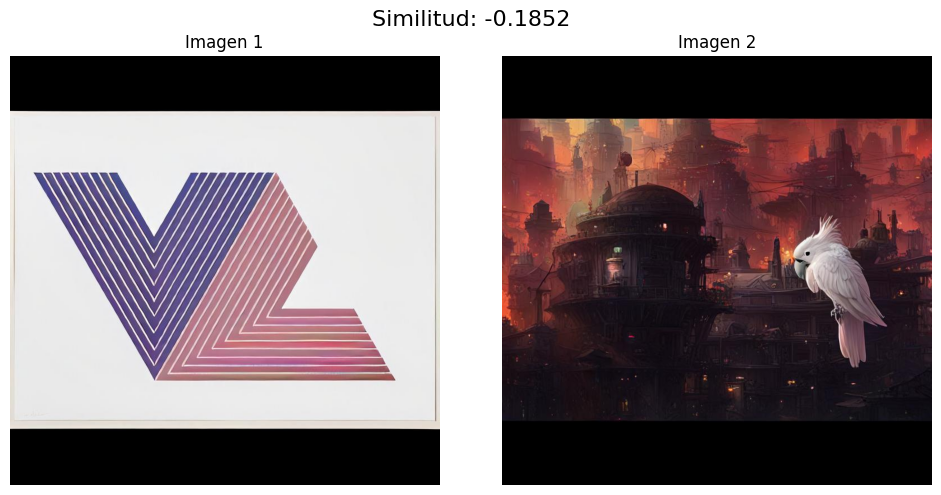

In [5]:
# Rutas a las imágenes
# image1_path = "imagenes/resize768/Impressionism/william-merritt-chase_still-life-with-cockatoo_resize768.jpg"
image2_path = "imagenes/SDXL/Impressionism/william-merritt-chase_still-life-with-cockatoo_resize768_generated.jpg"

image1_path = "imagenes/SDXL/Minimalism/frank-stella_ifafa-i-from-the-v-series-1968_resize768_generated.jpg"
# image2_path = "imagenes/SDXL/Minimalism/frank-stella_ifafa-ii-1967_resize768_generated.jpg"

# # Si no quieres usar texto, simplemente pasa None
# text1 = "a painting of a white bird sitting on a vase "  # o None
text2 = "a white bird is perched on a tall building " # o None
text1 = "a pink and blue geometric pattern with the letter v"  # o None
#text2 = "a green and black geometric pattern on a white background " # o None
# Calcular similitud
similarity = inference.calculate_similarity(image1_path, image2_path, text1, text2)
print(f"Similitud entre las imágenes: {similarity:.4f}")
# Visualizar las imágenes
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Mostrar imagen 1
img1 = Image.open(image1_path).convert('RGB')
axes[0].imshow(img1)
axes[0].set_title("Imagen 1")
axes[0].axis('off')

# Mostrar imagen 2
img2 = Image.open(image2_path).convert('RGB')
axes[1].imshow(img2)
axes[1].set_title("Imagen 2")
axes[1].axis('off')

plt.suptitle(f"Similitud: {similarity:.4f}", fontsize=16)
plt.tight_layout()
plt.show()

## 3. Buscar imágenes similares en un directorio

Ahora vamos a buscar imágenes similares a una imagen de referencia en un directorio.

In [ ]:
# Ruta a la imagen de referencia
reference_image = "imagenes/referencia.jpg"

# Directorio con imágenes para comparar
comparison_dir = "imagenes/comparacion"

# Descripción de la imagen de referencia (opcional)
reference_text = "Descripción de la imagen de referencia"  # o None

# Obtener lista de imágenes para comparar
comparison_dir_path = Path(comparison_dir)
comparison_images = [
    str(comparison_dir_path / f) for f in os.listdir(comparison_dir_path) 
    if f.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.webp'))
]

print(f"Comparando imagen de referencia con {len(comparison_images)} imágenes...")

# Calcular similitudes
results = inference.calculate_batch_similarities(reference_image, comparison_images, reference_text)

# Mostrar resultados
print("\nResultados (ordenados por similitud):")
for i, result in enumerate(results[:5]):  # Mostrar top 5
    print(f"{i+1}. {result['image_path']} - Similitud: {result['similarity']:.4f}")

In [ ]:
# Visualizar resultados
inference.visualize_similarities(reference_image, results, num_images=5)

## 4. Función personalizada para visualizar resultados

Podemos crear una función personalizada para visualizar los resultados de manera más flexible.

In [ ]:
def visualize_similarity_grid(reference_image, comparison_results, num_images=5, figsize=(15, 10)):
    """
    Visualiza las similitudes en una cuadrícula.
    
    Args:
        reference_image: Ruta a la imagen de referencia
        comparison_results: Resultados de calculate_batch_similarities
        num_images: Número de imágenes similares a mostrar
        figsize: Tamaño de la figura
    """
    # Limitar el número de imágenes a mostrar
    num_images = min(num_images, len(comparison_results))
    
    # Calcular filas y columnas para la cuadrícula
    n_cols = 3
    n_rows = (num_images + n_cols - 1) // n_cols
    
    # Crear figura
    fig = plt.figure(figsize=figsize)
    
    # Mostrar imagen de referencia en grande
    ax_ref = plt.subplot2grid((n_rows + 1, n_cols), (0, 0), colspan=n_cols)
    ref_img = Image.open(reference_image).convert('RGB')
    ax_ref.imshow(ref_img)
    ax_ref.set_title("Imagen de referencia", fontsize=14)
    ax_ref.axis('off')
    
    # Mostrar imágenes similares
    for i in range(num_images):
        row = i // n_cols + 1
        col = i % n_cols
        
        ax = plt.subplot2grid((n_rows + 1, n_cols), (row, col))
        
        img_path = comparison_results[i]['image_path']
        similarity = comparison_results[i]['similarity']
        
        img = Image.open(img_path).convert('RGB')
        ax.imshow(img)
        ax.set_title(f"Sim: {similarity:.4f}")
        ax.axis('off')
    
    plt.tight_layout()
    plt.show()

# Usar nuestra función personalizada
visualize_similarity_grid(reference_image, results, num_images=9)

## 5. Ejemplo con múltiples pares de imágenes

Podemos procesar múltiples pares de imágenes y mostrar sus similitudes.

In [ ]:
# Lista de pares de imágenes para comparar
image_pairs = [
    ("imagenes/par1_img1.jpg", "imagenes/par1_img2.jpg"),
    ("imagenes/par2_img1.jpg", "imagenes/par2_img2.jpg"),
    ("imagenes/par3_img1.jpg", "imagenes/par3_img2.jpg")
]

# Calcular similitudes para cada par
pair_similarities = []
for img1, img2 in image_pairs:
    similarity = inference.calculate_similarity(img1, img2)
    pair_similarities.append((img1, img2, similarity))

# Ordenar por similitud
pair_similarities.sort(key=lambda x: x[2], reverse=True)

# Mostrar resultados
print("Similitudes entre pares de imágenes (ordenadas de mayor a menor):")
for img1, img2, sim in pair_similarities:
    print(f"{img1} - {img2}: {sim:.4f}")

In [ ]:
# Visualizar todos los pares
fig, axes = plt.subplots(len(pair_similarities), 3, figsize=(15, 5 * len(pair_similarities)))

for i, (img1_path, img2_path, similarity) in enumerate(pair_similarities):
    # Mostrar imagen 1
    img1 = Image.open(img1_path).convert('RGB')
    axes[i, 0].imshow(img1)
    axes[i, 0].set_title(os.path.basename(img1_path))
    axes[i, 0].axis('off')
    
    # Mostrar similitud
    axes[i, 1].text(0.5, 0.5, f"Similitud:\n{similarity:.4f}", 
                    horizontalalignment='center',
                    verticalalignment='center',
                    fontsize=16)
    axes[i, 1].axis('off')
    
    # Mostrar imagen 2
    img2 = Image.open(img2_path).convert('RGB')
    axes[i, 2].imshow(img2)
    axes[i, 2].set_title(os.path.basename(img2_path))
    axes[i, 2].axis('off')

plt.tight_layout()
plt.show()

## 6. Análisis de embeddings

También podemos analizar los embeddings generados por el modelo para entender mejor cómo está representando las imágenes.

In [ ]:
# Función para obtener embeddings
def get_image_embedding(inference_model, image_path, text=None):
    """Obtiene el embedding de una imagen (y opcionalmente su texto)"""
    # Preprocesar imagen
    image = inference_model.preprocess_image(image_path)
    
    # Preprocesar texto si se proporciona
    text_inputs = None
    if text is not None and inference_model.config.USE_TEXT_EMBEDDINGS:
        text_inputs = inference_model.preprocess_text(text)
    
    # Obtener embedding
    with torch.no_grad():
        # Obtener embedding de imagen
        image_embedding = inference_model.model.encode_image(image)
        
        # Si hay texto, combinar embeddings
        if text_inputs is not None:
            text_embedding = inference_model.model.encode_text(
                text_inputs['input_ids'],
                text_inputs['attention_mask']
            )
            
            # Combinar embeddings según la configuración del modelo
            if hasattr(inference_model.model, 'fusion_layer'):
                combined = torch.cat([image_embedding, text_embedding], dim=1)
                embedding = inference_model.model.fusion_layer(combined)
                embedding = torch.nn.functional.normalize(embedding, p=2, dim=1)
            else:
                # Promedio simple
                embedding = (image_embedding + text_embedding) / 2
                embedding = torch.nn.functional.normalize(embedding, p=2, dim=1)
        else:
            embedding = image_embedding
    
    return embedding.cpu().numpy()

In [ ]:
# Obtener embeddings para algunas imágenes
image_paths = comparison_images[:10]  # Usar las primeras 10 imágenes de comparación
embeddings = [get_image_embedding(inference, img_path) for img_path in image_paths]

# Convertir lista de embeddings a matriz
embeddings_matrix = np.vstack([emb.reshape(1, -1) for emb in embeddings])
print(f"Forma de la matriz de embeddings: {embeddings_matrix.shape}")

In [ ]:
# Visualizar matriz de similitud
similarity_matrix = np.matmul(embeddings_matrix, embeddings_matrix.T)

plt.figure(figsize=(10, 8))
plt.imshow(similarity_matrix, cmap='viridis')
plt.colorbar(label='Similitud del coseno')
plt.title('Matriz de similitud entre imágenes')
plt.xticks(range(len(image_paths)), [os.path.basename(p) for p in image_paths], rotation=90)
plt.yticks(range(len(image_paths)), [os.path.basename(p) for p in image_paths])
plt.tight_layout()
plt.show()

## 7. Reducción de dimensionalidad para visualización

Podemos usar técnicas de reducción de dimensionalidad para visualizar los embeddings en 2D.

In [ ]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# Aplicar PCA para reducir a 2 dimensiones
pca = PCA(n_components=2)
embeddings_2d_pca = pca.fit_transform(embeddings_matrix)

# Aplicar t-SNE para reducir a 2 dimensiones
tsne = TSNE(n_components=2, random_state=42)
embeddings_2d_tsne = tsne.fit_transform(embeddings_matrix)

In [ ]:
# Visualizar embeddings en 2D
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# PCA
axes[0].scatter(embeddings_2d_pca[:, 0], embeddings_2d_pca[:, 1], s=100)
for i, img_path in enumerate(image_paths):
    axes[0].annotate(os.path.basename(img_path), 
                     (embeddings_2d_pca[i, 0], embeddings_2d_pca[i, 1]),
                     fontsize=9)
axes[0].set_title('Visualización PCA de embeddings')
axes[0].grid(True)

# t-SNE
axes[1].scatter(embeddings_2d_tsne[:, 0], embeddings_2d_tsne[:, 1], s=100)
for i, img_path in enumerate(image_paths):
    axes[1].annotate(os.path.basename(img_path), 
                     (embeddings_2d_tsne[i, 0], embeddings_2d_tsne[i, 1]),
                     fontsize=9)
axes[1].set_title('Visualización t-SNE de embeddings')
axes[1].grid(True)

plt.tight_layout()
plt.show()